In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib

In [14]:
# Wczytanie danych
train_df = pd.read_csv('../data/preprocessed/decision_tree/train.csv')
test_df = pd.read_csv('../data/preprocessed/decision_tree/test.csv')

X_train = train_df.drop('Fault_Condition', axis=1)
y_train = train_df['Fault_Condition']
X_test = test_df.drop('Fault_Condition', axis=1)
y_test = test_df['Fault_Condition']

print(f'Train: {X_train.shape}, Test: {X_test.shape}')
print(f'Klasy: {y_train.value_counts().to_dict()}')

Train: (128, 26), Test: (56, 26)
Klasy: {'faulty_zip': 32, 'faulty': 32, 'healthy': 32, 'healthy_zip': 32}


=== Prior Probabilities ===
faulty: 0.2500
faulty_zip: 0.2500
healthy: 0.2500
healthy_zip: 0.2500


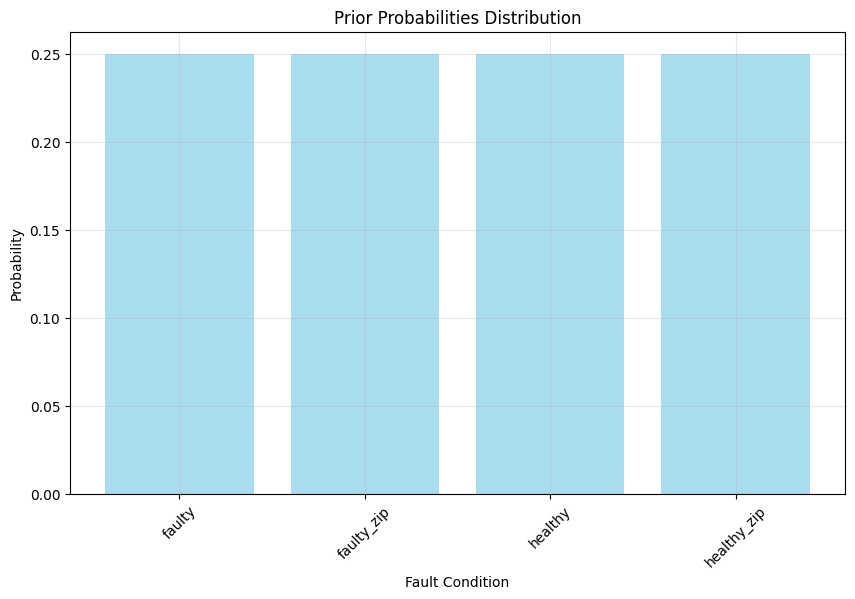

In [15]:
# Rozkłady priorów
prior_probs = y_train.value_counts(normalize=True).sort_index()
print('=== Prior Probabilities ===')
for class_name, prob in prior_probs.items():
    print(f'{class_name}: {prob:.4f}')

plt.figure(figsize=(10, 6))
plt.bar(prior_probs.index, prior_probs.values, alpha=0.7, color='skyblue')
plt.title('Prior Probabilities Distribution')
plt.xlabel('Fault Condition')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

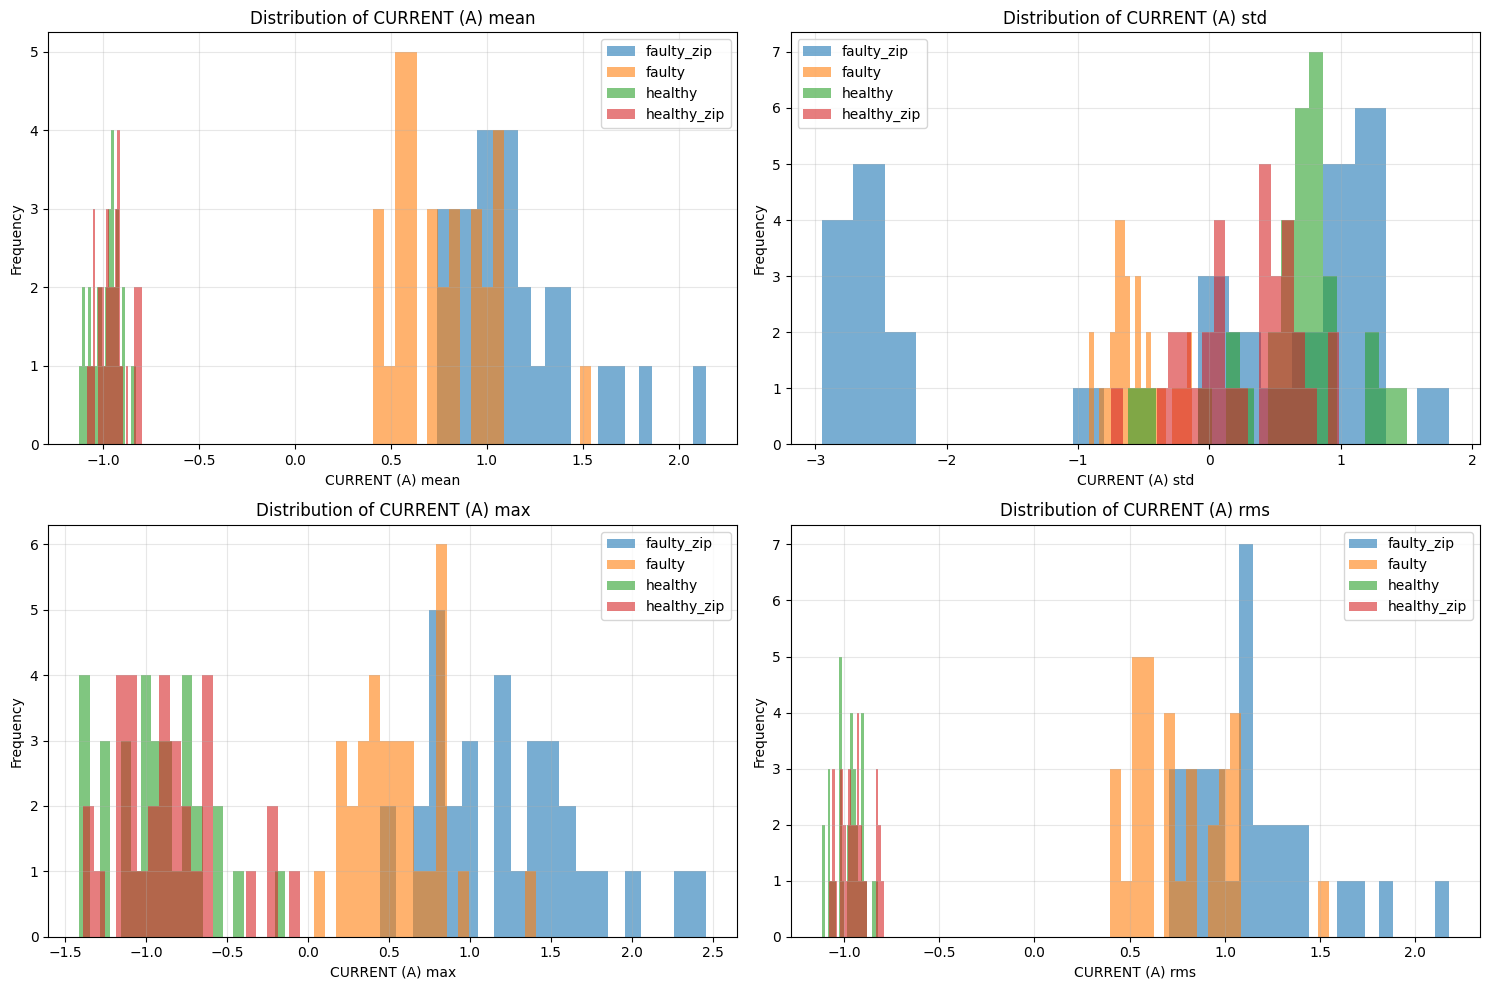

In [16]:
# Rozkłady cech dla każdej klasy (pierwsze 4 cechy)
features_to_plot = X_train.columns[:4]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    for class_name in y_train.unique():
        class_data = X_train[y_train == class_name][feature]
        axes[i].hist(class_data, alpha=0.6, label=class_name, bins=20)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== Gaussian Naive Bayes ===
Accuracy: 0.9464
              precision    recall  f1-score   support

      faulty       1.00      0.93      0.96        14
  faulty_zip       0.93      1.00      0.97        14
     healthy       1.00      0.86      0.92        14
 healthy_zip       0.88      1.00      0.93        14

    accuracy                           0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56



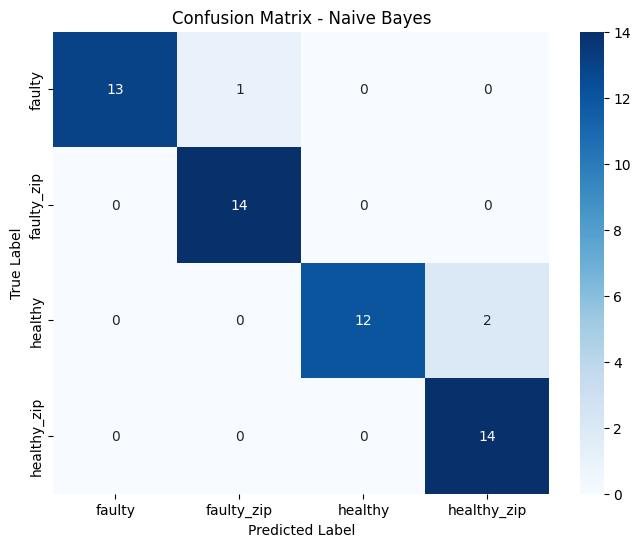

In [17]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print('=== Gaussian Naive Bayes ===')
print(f'Accuracy: {accuracy_score(y_test, nb_pred):.4f}')
print(classification_report(y_test, nb_pred))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

=== Quadratic Discriminant Analysis ===
Accuracy: 0.9107
              precision    recall  f1-score   support

      faulty       1.00      1.00      1.00        14
  faulty_zip       1.00      1.00      1.00        14
     healthy       0.80      0.86      0.83        14
 healthy_zip       0.85      0.79      0.81        14

    accuracy                           0.91        56
   macro avg       0.91      0.91      0.91        56
weighted avg       0.91      0.91      0.91        56



C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is 

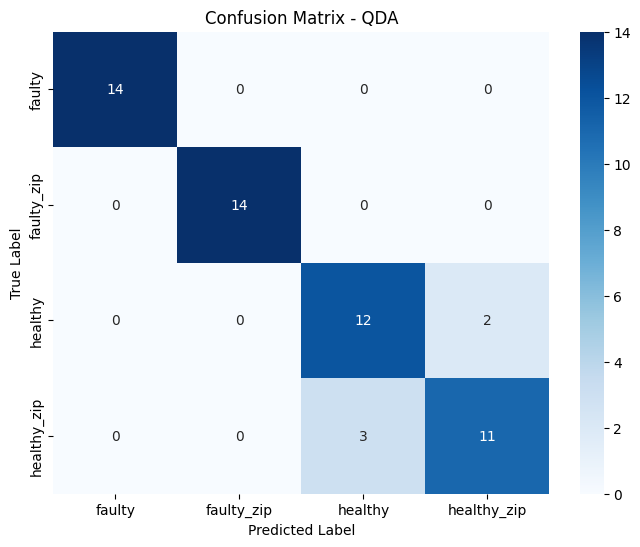

In [18]:
# Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)

print('=== Quadratic Discriminant Analysis ===')
print(f'Accuracy: {accuracy_score(y_test, qda_pred):.4f}')
print(classification_report(y_test, qda_pred))

# Confusion Matrix
cm_qda = confusion_matrix(y_test, qda_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda, annot=True, fmt='d', cmap='Blues', xticklabels=qda_model.classes_, yticklabels=qda_model.classes_)
plt.title('Confusion Matrix - QDA')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

=== Posterior Probabilities (first 5 samples) ===

Naive Bayes:
Sample 1: {np.str_('faulty'): np.float64(1.5842835112943911e-34), np.str_('faulty_zip'): np.float64(1.0), np.str_('healthy'): np.float64(0.0), np.str_('healthy_zip'): np.float64(0.0)}
Sample 2: {np.str_('faulty'): np.float64(1.8200878779998807e-91), np.str_('faulty_zip'): np.float64(1.0), np.str_('healthy'): np.float64(0.0), np.str_('healthy_zip'): np.float64(0.0)}
Sample 3: {np.str_('faulty'): np.float64(0.0), np.str_('faulty_zip'): np.float64(3.450843244387581e-202), np.str_('healthy'): np.float64(0.999999908927404), np.str_('healthy_zip'): np.float64(9.107259613646848e-08)}
Sample 4: {np.str_('faulty'): np.float64(0.999999999770723), np.str_('faulty_zip'): np.float64(2.2927686930701525e-10), np.str_('healthy'): np.float64(0.0), np.str_('healthy_zip'): np.float64(0.0)}
Sample 5: {np.str_('faulty'): np.float64(0.999999999999929), np.str_('faulty_zip'): np.float64(7.182759118427136e-14), np.str_('healthy'): np.float64(0.0)

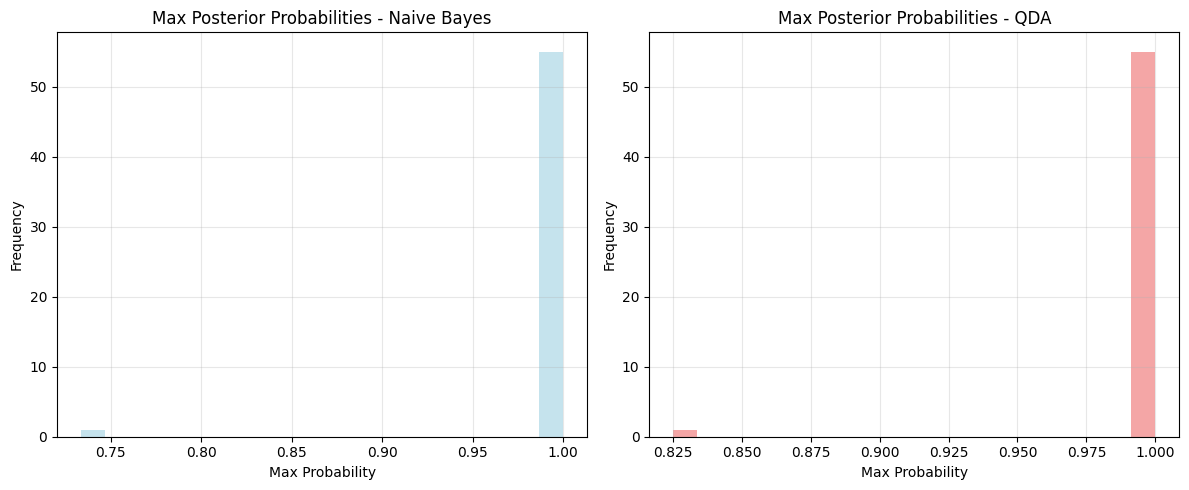

In [19]:
# Prawdopodobieństwa posteriori dla próbek testowych
nb_proba = nb_model.predict_proba(X_test)
qda_proba = qda_model.predict_proba(X_test)

# Przykładowe prawdopodobieństwa dla pierwszych 5 próbek
print('=== Posterior Probabilities (first 5 samples) ===')
print('\nNaive Bayes:')
for i in range(5):
    print(f'Sample {i+1}: {dict(zip(nb_model.classes_, nb_proba[i]))}')

print('\nQDA:')
for i in range(5):
    print(f'Sample {i+1}: {dict(zip(qda_model.classes_, qda_proba[i]))}')

# Rozkład maksymalnych prawdopodobieństw posteriori
max_proba_nb = np.max(nb_proba, axis=1)
max_proba_qda = np.max(qda_proba, axis=1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(max_proba_nb, bins=20, alpha=0.7, color='lightblue')
plt.title('Max Posterior Probabilities - Naive Bayes')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(max_proba_qda, bins=20, alpha=0.7, color='lightcoral')
plt.title('Max Posterior Probabilities - QDA')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=cv, scoring='accuracy')
qda_cv_scores = cross_val_score(qda_model, X_train, y_train, cv=cv, scoring='accuracy')

print('=== Cross-Validation Results ===')
print(f'Naive Bayes CV: {nb_cv_scores.mean():.4f} ± {nb_cv_scores.std():.4f}')
print(f'QDA CV: {qda_cv_scores.mean():.4f} ± {qda_cv_scores.std():.4f}')

=== Cross-Validation Results ===
Naive Bayes CV: 0.9212 ± 0.0501
QDA CV: 0.5249 ± 0.1001


C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\norbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is 

=== Model Comparison ===
         Model  Test Accuracy   CV Mean    CV Std
0  Naive Bayes       0.946429  0.921231  0.050140
1          QDA       0.910714  0.524923  0.100132


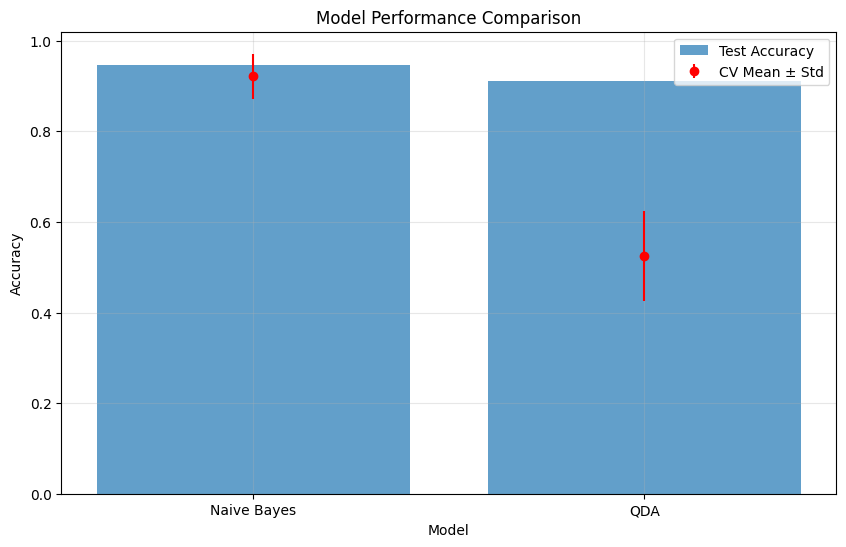

In [21]:
# Porównanie modeli
nb_acc = accuracy_score(y_test, nb_pred)
qda_acc = accuracy_score(y_test, qda_pred)

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'QDA'],
    'Test Accuracy': [nb_acc, qda_acc],
    'CV Mean': [nb_cv_scores.mean(), qda_cv_scores.mean()],
    'CV Std': [nb_cv_scores.std(), qda_cv_scores.std()]
})

print('=== Model Comparison ===')
print(results_df)

# Wykres porównawczy
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
plt.bar(x, results_df['Test Accuracy'], alpha=0.7, label='Test Accuracy')
plt.errorbar(x, results_df['CV Mean'], yerr=results_df['CV Std'], fmt='o', color='red', label='CV Mean ± Std')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, results_df['Model'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Zapisanie najlepszego modelu
if qda_acc > nb_acc:
    joblib.dump(qda_model, 'QDA_motor_classifier.pkl')
    print(f'Zapisano QDA model (accuracy: {qda_acc:.4f})')
else:
    joblib.dump(nb_model, 'NaiveBayes_motor_classifier.pkl')
    print(f'Zapisano Naive Bayes model (accuracy: {nb_acc:.4f})')

Zapisano Naive Bayes model (accuracy: 0.9464)
